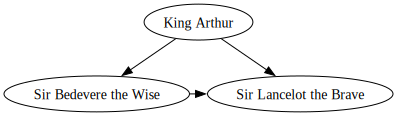

In [2]:
import graphviz

round_table = graphviz.Digraph('round-table', comment='The Round Table')  
round_table.node('A', 'King Arthur')  
round_table.node('B', 'Sir Bedevere the Wise')
round_table.node('L', 'Sir Lancelot the Brave')
round_table.edges(['AB', 'AL'])
round_table.edge('B', 'L', constraint='false')
round_table

In [8]:
from nn.value import Value

# function: y = 3x + 2, a = 3 and b = 2
a = Value(2, _label="a"); a.compute_order = 1
b = Value(-3, _label="b"); b.compute_order = 2
c = Value(10, _label="c"); c.compute_order = 3
e = a * b; e.compute_order = 4
e.label = "e"
d = e + c; d.compute_order = 5
d.label = "d"
f = Value(-2, _label="f")
L = d * f; L.compute_order = 6
L.label = "L"
print(L)


<class 'nn.value.Value'>(data=-8)


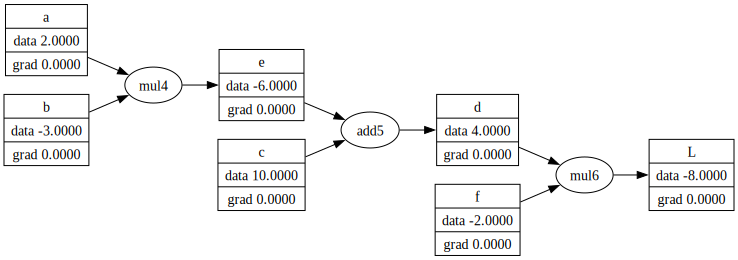

In [9]:
from nn.utils import draw_compute_graph
draw_compute_graph(L)

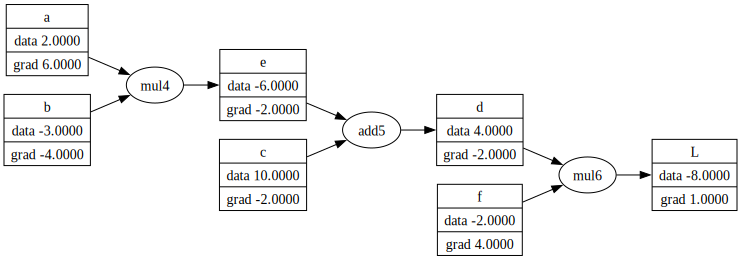

In [10]:
from nn.utils import backprop
bp = backprop(L) # backpropagated graph
draw_compute_graph(bp)


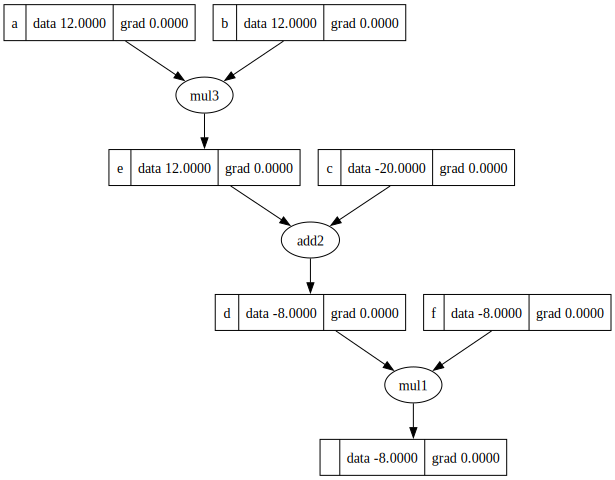

In [24]:
up = update_value_with_grad(bp) # updated graph after backprop
draw_compute_graph(up)

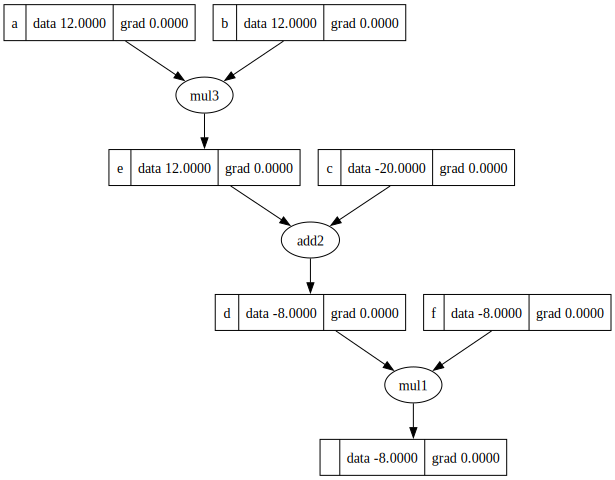

In [25]:
draw_compute_graph(bp)

<class 'nn.value.Value'>(data=0.8813735870195432) <class 'nn.value.Value'>(data=0.7071067811865476)


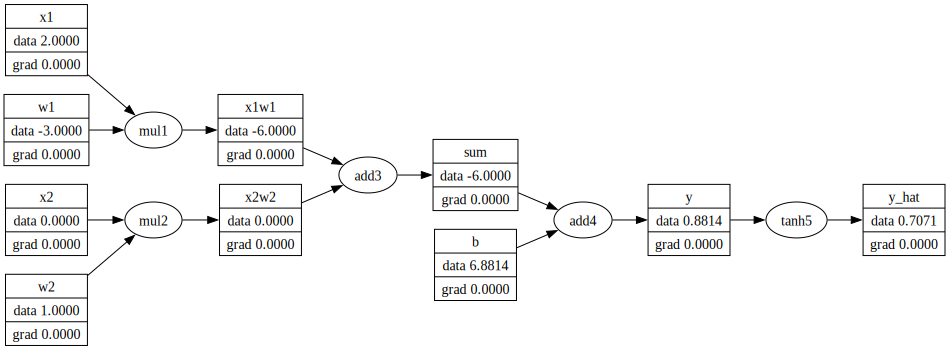

In [6]:
from nn.activation_functions import tanh
from nn.value import Value
from nn.utils import draw_compute_graph

# input x1, x2
x1 = Value(2.0, _label='x1')
x2 = Value(0.0, _label='x2')
# weights w1, w2
w1 = Value(-3.0, _label='w1')
w2 = Value(1.0, _label='w2')
# bias of neuron
b = Value(6.8813735870195432, _label='b')
x1w1 = x1 * w1; x1w1.label = 'x1w1'; x1w1.compute_order = 1
x2w2 = x2 * w2; x2w2.label = 'x2w2'; x2w2.compute_order = 2
sum = x1w1 + x2w2; sum.label = 'sum'; sum.compute_order = 3
y = sum + b; y.label = 'y'; y.compute_order = 4
y_hat = Value(tanh(y.data), _prev=(y, ), _op="tanh"); y_hat.label= 'y_hat'; y_hat.compute_order = 5
print(y, y_hat)
draw_compute_graph(y_hat)


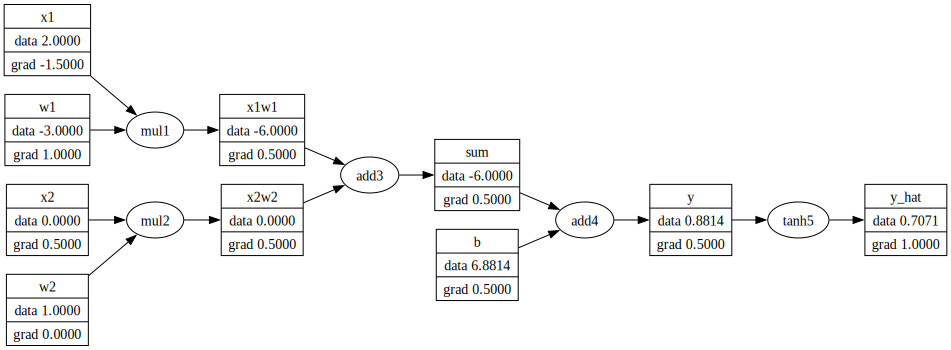

In [7]:
from nn.utils import backprop
bpyhat = backprop(y_hat) # backpropagated graph
draw_compute_graph(bpyhat)

In [5]:
w2.grad

1